<a href="https://colab.research.google.com/github/Darlan-Almeida/Noisy-Store/blob/Analytics/Noisy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bibliotecas utils

In [1]:
!pip install Faker
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.6 MB/s eta 0:00:0000:0100:01


# Carregar o arqivo cliente.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

# Abrir o arquivo clientes.csv


In [3]:
arquivo = open('Clientes.csv')
print(arquivo.read())

DSS DOS ESTADOS DO BRASIL EM UM DICT


In [6]:
# DDDs organizados por estado
ddds = {
    'acre': ['68'],
    'alagoas': ['82'],
    'amapa': ['96'],
    'amazonas': ['92', '97'],
    'bahia': ['71', '73', '74', '75', '77'],
    'ceara': ['85', '88'],
    'distrito_federal': ['61'],
    'espirito santo': ['27', '28'],
    'goias': ['62', '64'],
    'maranhao': ['98', '99'],
    'mato grosso': ['65', '66'],
    'mato grosso do sul': ['67'],
    'minas gerais': ['31', '32', '33', '34', '35', '37', '38'],
    'para': ['91', '93', '94'],
    'paraiba': ['83'],
    'parana': ['41', '42', '43', '44', '45', '46'],
    'pernambuco': ['81', '87'],
    'piaui': ['86', '89'],
    'rio de janeiro': ['21', '22', '24'],
    'rio grande do norte': ['84'],
    'rio grande do sul': ['51', '53', '54', '55'],
    'rondonia': ['69'],
    'roraima': ['95'],
    'santa catarina': ['47', '48', '49'],
    'sao paulo': ['11', '12', '13', '14', '15', '16', '17', '18', '19'],
    'sergipe': ['79'],
    'tocantins': ['63']
}

apenas_ddd = []
for i in ddds.items():
    for j in i[1]:
        apenas_ddd.append(j)
print(apenas_ddd)

['68', '82', '96', '92', '97', '71', '73', '74', '75', '77', '85', '88', '61', '27', '28', '62', '64', '98', '99', '65', '66', '67', '31', '32', '33', '34', '35', '37', '38', '91', '93', '94', '83', '41', '42', '43', '44', '45', '46', '81', '87', '86', '89', '21', '22', '24', '84', '51', '53', '54', '55', '69', '95', '47', '48', '49', '11', '12', '13', '14', '15', '16', '17', '18', '19', '79', '63']


Criar Base de dados Fakes com 1000 registros Clientes com Nome , Email ,Numero com DD brasileiro , Cargo. Colocar em arquivo clientes.
csv



In [17]:
from faker import Faker
import csv
import datetime
from random import random , randint

fake = Faker('pt_BR')

num_colunas = 100000

colunas = ["nome", "email", "telefone", "cargo", "data", 'estado', 'genero', ]

cargos = ['Diretor', 'Vice-Diretor', 'Coordenador', 'Professor', 'Assitente Administrativo' , 'Orientador Educacional']

def fake_numero_br():
    phone_number = f"+55 ({apenas_ddd[randint(0, 66)]}) 9{randint(1000, 9999)}-{randint(1000, 9999)}"
    return phone_number

with open('Clientes.csv', 'w', newline='') as arquivo:
  writer = csv.writer(arquivo)
  writer.writerow(colunas)
  for i in range(num_colunas):

    nome = fake.name()
    email = fake.email()
    telefone = fake_numero_br()
    cargo = cargos[randint(0,5)]
    data = fake.date_between_dates(
            date_start=datetime.date(2024, 1, 1),
                                date_end=datetime.date(2024, 12, 31)
        )

    genero = "Não identificado"
    writer.writerow([nome, email , telefone, cargo, data])

Visualizar arquivo em dataframe

In [20]:
import pandas as pd

df = pd.read_csv("Clientes.csv")
df.head()


,nome,email,telefone,cargo,data,estado,genero
0,Maria Liz Siqueira,evelyngarcia@example.org,+55 (32) 92061-4298,Professor,2024-10-04,minas gerais,Não indentificado
1,Davi Lucca Silva,murilo96@example.net,+55 (54) 97592-7937,Coordenador,2024-08-01,rio grande do sul,Não indentificado
2,Luigi Pires,kleao@example.net,+55 (42) 98467-7827,Professor,2024-09-11,parana,Não indentificado
3,João Garcia,lauramachado@example.com,+55 (67) 97690-3404,Assitente Administrativo,2024-01-12,mato grosso do sul,Não indentificado
4,Davi Viana,pedro-miguel27@example.net,+55 (89) 98146-9323,Coordenador,2024-05-06,piaui,Não indentificado




```
# Isto está formatado como código
```

preencher a coluna estado pelo número de telefone e a coluna genêro por não identificado.

In [19]:
import re

def busca_estado(telefone):
  padrao = r'\((.*?)\)'
  resultado_ddd = re.search(padrao, telefone).group(1)

  for i in ddds.items():
    estado = i[0]
    for j in i[1]:
        if j == resultado_ddd:
          return (estado)

df['estado']= df['telefone'].apply(busca_estado)
df['genero'] = 'Não indentificado'


df.to_csv('Clientes.csv' , index=False)

Visualizar a distribuição dos cargos através de um gráfico de barras:


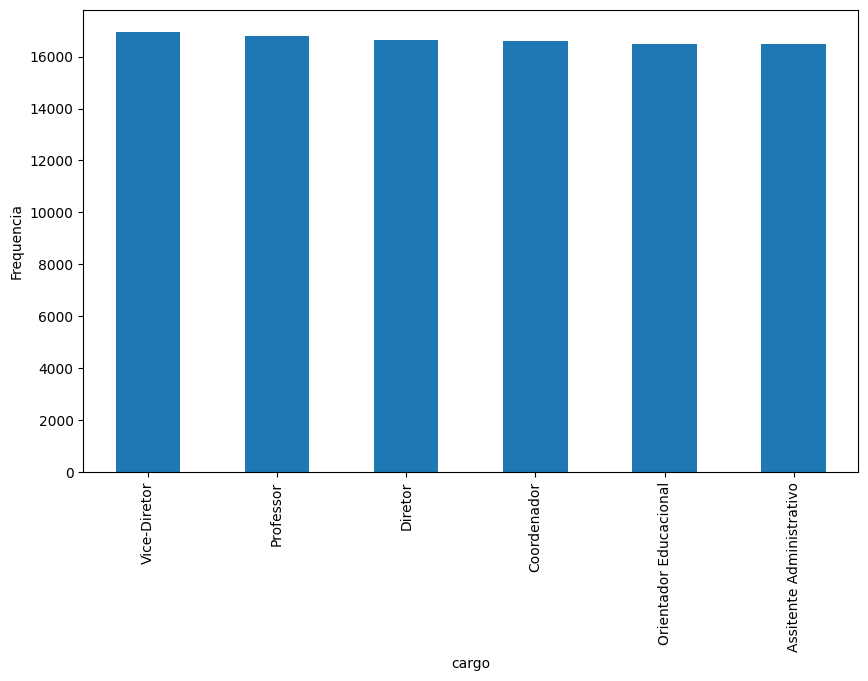

In [21]:
import matplotlib.pyplot as plt

contagem_cargos = df['cargo'].value_counts()

plt.figure(figsize=(10,6))
contagem_cargos.plot(kind='bar')
plt.xlabel('cargo')
plt.ylabel('Frequencia')
plt.show()

Visualizar a distribuição dos estados dos interessados através de um gráfico de pizza: Na distribuição de regiões, estados por região e dos 10 estados mais significanteno


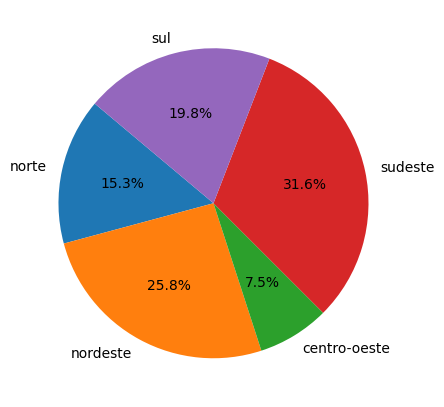

In [43]:
norte = ['amazonas', 'acre', 'roraima', 'rondonia', 'amapa', 'para', 'tocantins']
nordeste = ['ceara', 'piaui', 'maranhao', 'rio grande do norte', 'paraiba', 'pernambuco', 'alagoas', 'sergipe', 'bahia']
centro_oeste = ['mato grosso', 'goias', 'distrito federal', 'mato grosso do sul']
sudeste = ['sao paulo', 'rio de janeiro', 'minas gerais', 'espirito santo']
sul = ['parana', 'santa catarina', 'rio grande do sul']

contagem_estados = df['estado'].value_counts()

regioes = {
    'norte': norte,
    'nordeste': nordeste,
    'centro-oeste': centro_oeste,
    'sudeste': sudeste,
    'sul': sul
}

frequencia_regiao ={
    'norte': 0,
    'nordeste': 0,
    'centro-oeste': 0,
    'sudeste': 0,
    'sul': 0
}

def busca_regiao(estado):
  regiao = None
  for i in regioes.items():
    for j in i[1]:
      if j == estado:
        regiao = i[0]
        return regiao

for frequencia in contagem_estados.items():
  estado = frequencia[0]
  valor = frequencia[1]
  for busca in regioes.items():
    for procura_estado in busca[1]:
      if procura_estado == estado:
        frequencia_regiao[busca[0]] += frequencia[1]

#gráfico por região do brasil
plt.figure(figsize=(5, 10))
plt.pie(list(frequencia_regiao.values()) , labels=list(frequencia_regiao.keys()) , autopct='%1.1f%%', startangle=140)
plt.show()


df['regiao'] = None
df['regiao']= df['estado'].apply(busca_regiao)












Clientes por estados de cada regiao


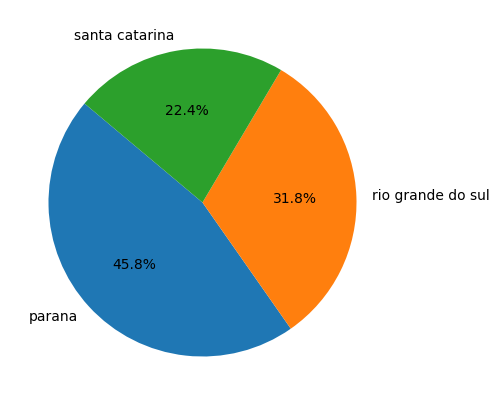

In [42]:
regiao = input()
df_regiao = df[df['regiao'] == regiao]

estados_regiao = regioes[regiao]
frequencia_norte = df_regiao['estado'].value_counts()

plt.figure(figsize=(10,5))
plt.pie(frequencia_norte , labels=frequencia_norte.index , autopct='%1.1f%%', startangle=140)
plt.show()

Verificar domínio do E-mail e verificar os dominios empresariais que estão repetidos

TypeError: expected string or bytes-like object

Gráfico de distríbuição em relação aos meses em que os clientes entraram em contato

{'01': 8460, '02': 7994, '03': 8537, '04': 8094, '05': 8584, '06': 8234, '07': 8395, '08': 8575, '09': 8289, '10': 8465, '11': 8198, '12': 8175}


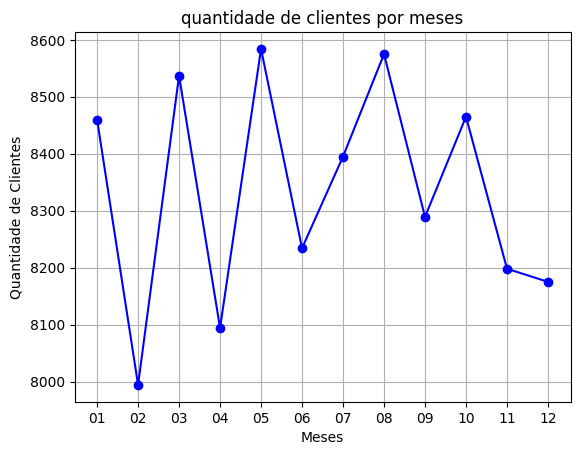

In [74]:
import re

frequencia_datas = {}

#regex para extrair mes da data
padrao = r"(\d{4})-(\d{2})-(\d{2})"

for i in range(1 , 13):
    if i < 10:
        mes_formato = f'0{i}'     
    else:
        mes_formato = f'{i}'
    frequencia_datas[mes_formato] = 0


for i in df['data']:
    ano = re.match(padrao, i).group(1)
    mes = re.match(padrao, i).group(2)
    dia = re.match(padrao, i).group(3)
    if mes in frequencia_datas:
        frequencia_datas[mes] += 1

print(frequencia_datas)

x = frequencia_datas.keys()
y =  frequencia_datas.values()


plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.xlabel('Meses')
plt.ylabel('Quantidade de Clientes')
plt.title('quantidade de clientes por meses')
plt.grid(True)
plt.show()

aplicar coluna sobre status de negociação, por padrão vazio

In [76]:
df['status de negociacao'] = 'Null'
df.head()
df.to_csv('Clientes.csv' , index=False)


Analisar a relação entre o cargo e o status de negociação:


In [ ]:
Analisar a relação entre o cargo e o status de negociação:


Importar esses dados para o banco de dados de forma automatizada

Com base no nome saber se é homem ou mulher -> NLP